In [1]:
#Set-up
#Dependencies
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

#File path to csv and displaying it
Weekly_Covid = "Resources/Weekly_Covid_State.csv"
Weekly_Covid_df = pd.read_csv(Weekly_Covid)
Weekly_Covid_df.head()

,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths
0,2020-01-23,AK,2020-01-16,2020-01-22,0,0,0,0
1,2020-01-30,AK,2020-01-23,2020-01-29,0,0,0,0
2,2020-02-06,AK,2020-01-30,2020-02-05,0,0,0,0
3,2020-02-13,AK,2020-02-06,2020-02-12,0,0,0,0
4,2020-02-20,AK,2020-02-13,2020-02-19,0,0,0,0


In [2]:
#Getting the columns that are needed
Covid_df = Weekly_Covid_df[["state","start_date","tot_cases"]]
Covid_df.head()

,state,start_date,tot_cases
0,AK,2020-01-16,0
1,AK,2020-01-23,0
2,AK,2020-01-30,0
3,AK,2020-02-06,0
4,AK,2020-02-13,0


In [3]:
#Seeing all the unique states in the dataframe
print(Covid_df['state'].unique())

['AK' 'AL' 'AR' 'AS' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'FSM' 'GA' 'GU'
 'HI' 'IA' 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO'
 'MP' 'MS' 'MT' 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'NYC' 'OH' 'OK'
 'OR' 'PA' 'PR' 'PW' 'RI' 'RMI' 'SC' 'SD' 'TN' 'TX' 'UT' 'VA' 'VI' 'VT'
 'WA' 'WI' 'WV' 'WY']


In [4]:
#Removing all cities and territories in the dataset
Covid_df.drop(Covid_df.index[(Covid_df["state"] == "AS")],axis=0,inplace=True)
Covid_df.drop(Covid_df.index[(Covid_df["state"] == "GU")],axis=0,inplace=True)
Covid_df.drop(Covid_df.index[(Covid_df["state"] == "MH")],axis=0,inplace=True)
Covid_df.drop(Covid_df.index[(Covid_df["state"] == "MP")],axis=0,inplace=True)
Covid_df.drop(Covid_df.index[(Covid_df["state"] == "OW")],axis=0,inplace=True)
Covid_df.drop(Covid_df.index[(Covid_df["state"] == "PR")],axis=0,inplace=True)
Covid_df.drop(Covid_df.index[(Covid_df["state"] == "PW")],axis=0,inplace=True)
Covid_df.drop(Covid_df.index[(Covid_df["state"] == "OW")],axis=0,inplace=True)
Covid_df.drop(Covid_df.index[(Covid_df["state"] == "VI")],axis=0,inplace=True)
Covid_df.drop(Covid_df.index[(Covid_df["state"] == "UM")],axis=0,inplace=True)
Covid_df.drop(Covid_df.index[(Covid_df["state"] == "DC")],axis=0,inplace=True)
Covid_df.drop(Covid_df.index[(Covid_df["state"] == "FSM")],axis=0,inplace=True)
Covid_df.drop(Covid_df.index[(Covid_df["state"] == "LA")],axis=0,inplace=True)
Covid_df.drop(Covid_df.index[(Covid_df["state"] == "NYC")],axis=0,inplace=True)
Covid_df.drop(Covid_df.index[(Covid_df["state"] == "RMI")],axis=0,inplace=True)
print(Covid_df['state'].unique())


['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID' 'IL'
 'IN' 'KS' 'KY' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC' 'ND' 'NE'
 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN' 'TX'
 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']


In [5]:
#Getting the National sum and average of all cases in 2020
National_Cases_2020 = Covid_df.loc[Covid_df.start_date == "2020-12-31",:]
Sum_2020 = National_Cases_2020["tot_cases"].sum()
National_Average_2020 = Sum_2020/50
print(National_Average_2020)

411666.1


In [6]:
#Getting the National sum and average of all cases in 2021
National_Cases_2021 = Covid_df.loc[Covid_df.start_date == "2021-12-30",:]
Sum_2021 = National_Cases_2021["tot_cases"].sum()
National_Average_2021 = Sum_2021/50
print(National_Average_2021)

1094754.24


In [7]:
#Getting the National sum and average of all cases in 2022
National_Cases_2022 = Covid_df.loc[Covid_df.start_date == "2022-10-27",:]
Sum_2022 = National_Cases_2022["tot_cases"].sum()
National_Average_2022 = Sum_2022/50
print(National_Average_2022)

1837934.42


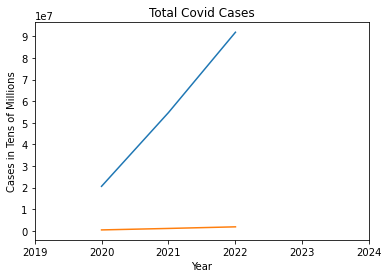

In [8]:
#Creating Line Graph
#setting up axis for line graph
line_x_axis = [2020,2021,2022]
line_y_axis_sum = [Sum_2020, Sum_2021,Sum_2022]
line_y_axis_avg = [National_Average_2020, National_Average_2021, National_Average_2022]
#plotting the graph and saving image to folder
plt.plot(line_x_axis, line_y_axis_sum)
plt.plot(line_x_axis, line_y_axis_avg)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.xlim([2019,2024])
plt.yticks(np.arange(0, 100000000, 10000000))
plt.title("Total Covid Cases")
plt.xlabel("Year")
plt.ylabel("Cases in Tens of Millions")
plt.savefig("Images/Total_Covid_Cases.png")